In [1]:
from IPython.display import YouTubeVideo

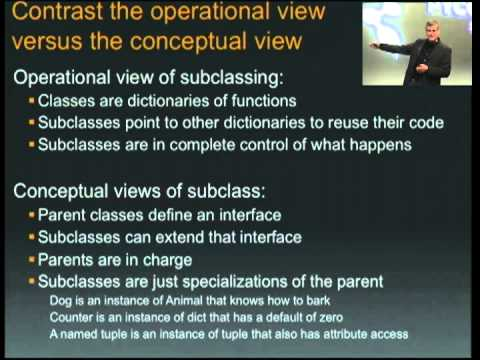

In [2]:
YouTubeVideo('miGolgp9xq8', start=0)

Content
- define class, subclass, instance
- use cases, principles, design patterns
- how to use `super()`
    

In [4]:
class Animal:
    'Generic animal class'
    def __init__(self, name):
        self.name = name       
    def walk(self):
        print('{} is walking'.format(self.name))
        
class Dog(Animal):
    "Man's best friend"
    def bark(self):
        print('Woof')

Terminology:

- Adding: add new method

- Overriding: replace method

- Extending: modify existing method, to add capability, and still delegating work to parent 

Patterns for Subclassing:
- Frameworks
    - parent class supplies all of the "controller" functionality and makes calls to pre-named stub methods
    - subclass overrides stub methods of interest
    - example [`SimpleHTTPServer`](https://docs.python.org/2/library/simplehttpserver.html)
    - traditional static pattern
        - cannot add
        
- Dynamic dispatch to subclass methods
    - parent class uses `getattr()` to dispatch to new functionality
    - child class implements appropriately named methods
    - example [`Cmd`](https://docs.python.org/3.6/library/cmd.html)
        - build custom command interpreter by sublassing 'Cmd'
        - `command` is dispatched to `do_command()`
        - allow subclasses to add commands without changing parent, i. e. dispatch logic
        
=> polish classes to make future subclassing easier

In [ ]:
class Circle:
    def __init__(self, radius):
        self.radius = radius
    def area(self):
        return self.radius**2 * math.pi
    def __repr__(self):
        return '%s has area %s' % (
            self.__class__.__name__, self.area())  # self is subclass, call area of Donut!
    
class Donut(Circle):
    def __init__(self, outer, inner):
        Circle.__init__(self, outer)  # extend init using super()
        self.inner = inner
    def area(self):                   # override area method
        outer, inner = self.radius, self.inner
        return Circle(outer).area() - Circle(inner).area()

- Call Patterns for Subclassing

`print(Donut)`

    - `self` is one of classes descendents, instance of class containing `self`
    - `super` calls ancestors of subclass, which may not be ancestors of this class
    - "`super` means go up from your children"

Retool thinking about subclasses

- object: encapsulated data and methods that manipulate data
- implemented using dictionaries
    - instance dicts hold state, and point to their class
    - class dicts hold methods
    
- subclass (20:00):
    - class that delegates work to another parent class
    - subclass and parent are two dicts containing functions
    - subclass points to parent
    - subclassing means *delegation*, not specialisation
    - technique for code re-use
    - subclass is in charge
    - subclass decides what is delegated

## Contrast operational view versus conceptional (often taught) view

- *operational view* <- usefull view
    - classes are dicts of functions
    - subclasses point to other classes to reuse their code
    - subclasses are in complete control of what happens
    
- conceptual view
    - parent class defined interface
    - subclasses can extend that interface
    - parents are in charge
    - subclasses are ust specialisation of the parent
        - Animal <- Dog

## Liskov Substitution Principle (22:40)

"If S is a subtype of T, then objects of type T map be replaced with objects of the S"

- it is about polymorphism and substitutability so that subclasses can be used in client code
    - cash register calls `accept_payment()` on payment object: cash, cheques, credit cards
    
- NOT A LAW
- common examples:
    - different constructor for [array](https://docs.python.org/3/library/array.html):
        - `list(iterable)` vs. `array(type, iterable)`
- goal is to isolate/minimize impact
    - example `set.union()` that creates new set
        - constructor factored out to `_from_iterable` as adapter for costructor, which can then have different signature
        
- *factor Liskov violations into one place*

## Circle vs. Ellipse (29:30)

**Liskov: Which is in charge, more general? They would break each other.**

- ellipse: stretch an axis
- circle: bounding box is square

=> Parent maximises code reuse

**Lessons:**
- Taxonomies do not neatly transform into usefull class hierarchies
- substitutability can be hard problem
- challenge view subclass as form of specialisation
- think about design in terms of code reuse
    - parent is most reusable
- unsure about from which error to subclass: use multiple inheritance (not a taxonomy)

## Open-Closed Principle (35:00)
"Software should be open for extension, but closed for modification."
